# Salmon Price Analysis

In this project, we aim to demonstrate advanced techniques in model selection and forecasting through a detailed time series analysis of Norwegian farmed Salmon prices. Our focus will be on uncovering patterns, trends, and predictive insights from this unique dataset, leveraging statistical methods tailored for time-dependent data.

In [2]:
#Read in the data from R library "astsa"
require("astsa")
# check the data structure of  the'salmon' data set
str(salmon)

Loading required package: astsa



 Time-Series [1:166] from 2004 to 2017: 2.88 3.16 2.96 3.12 3.23 3.32 3.45 3.61 3.48 3.21 ...


'salmon' is a R building in time series structure in between 2004 and 2017 with 166 monthly entries.

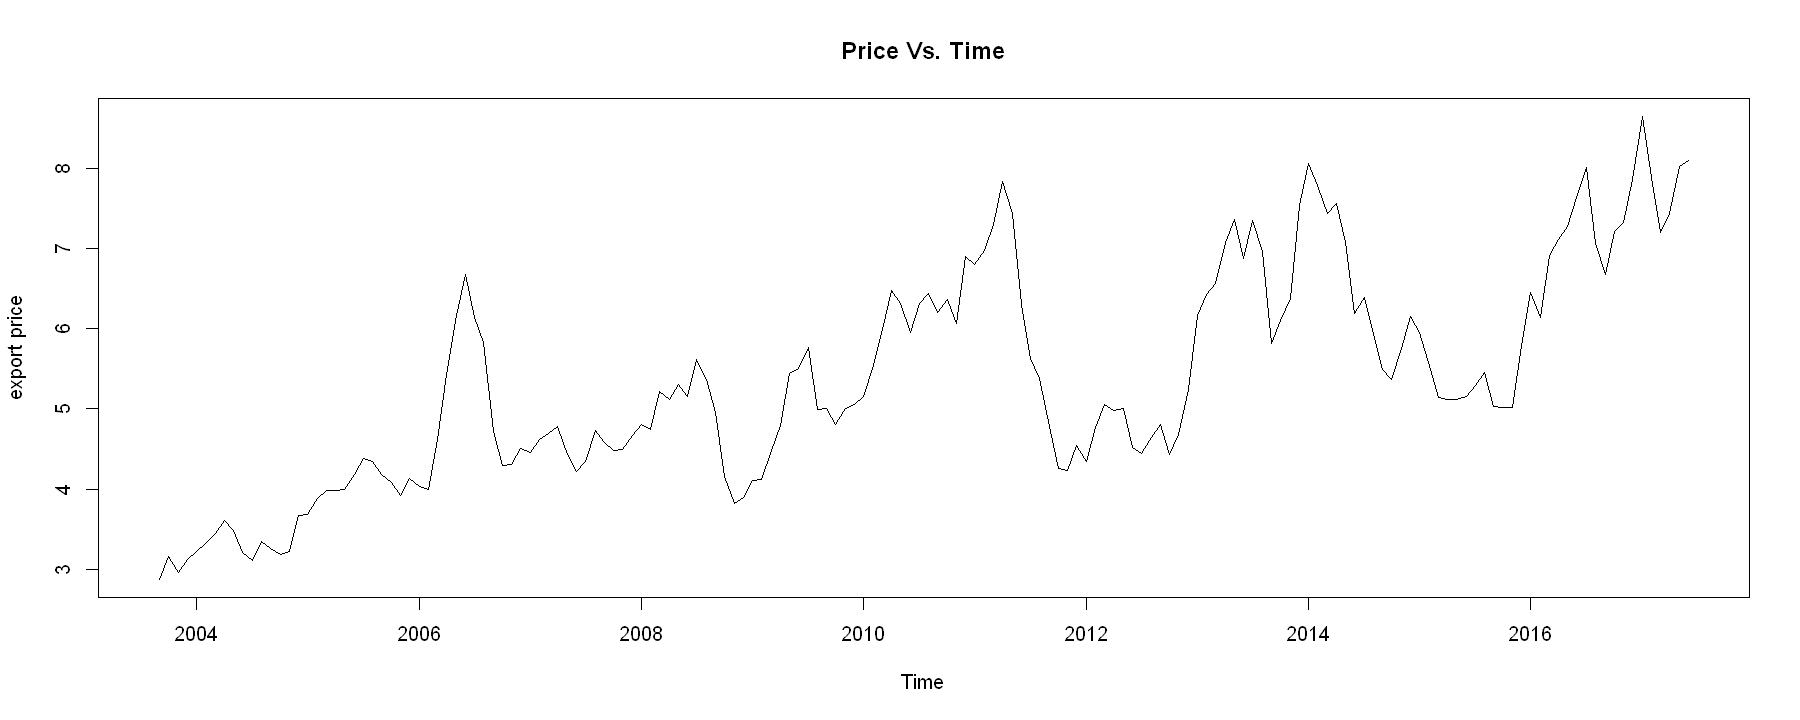

In [3]:
options(repr.plot.width = 15, repr.plot.height = 6)
plot.ts(salmon, main = "Price Vs. Time", ylab = "export price")

The price of Norwegian Salmon exhibits a discernible upward trend and monthly fluctuations. To separate the random fluctuations from predictable changes, we employ a differencing technique on the Salmon price data. By calculating the difference between pairs of observations at lag 1, we can effectively eliminate the increasing trend in the data. Additionally, applying differencing at lag 12 will address and remove the seasonal trend. This process aids in transforming the time series into a stationary one, where the mean, variance, and autocorrelation structure do not change over time, thereby simplifying further analysis and modelling.

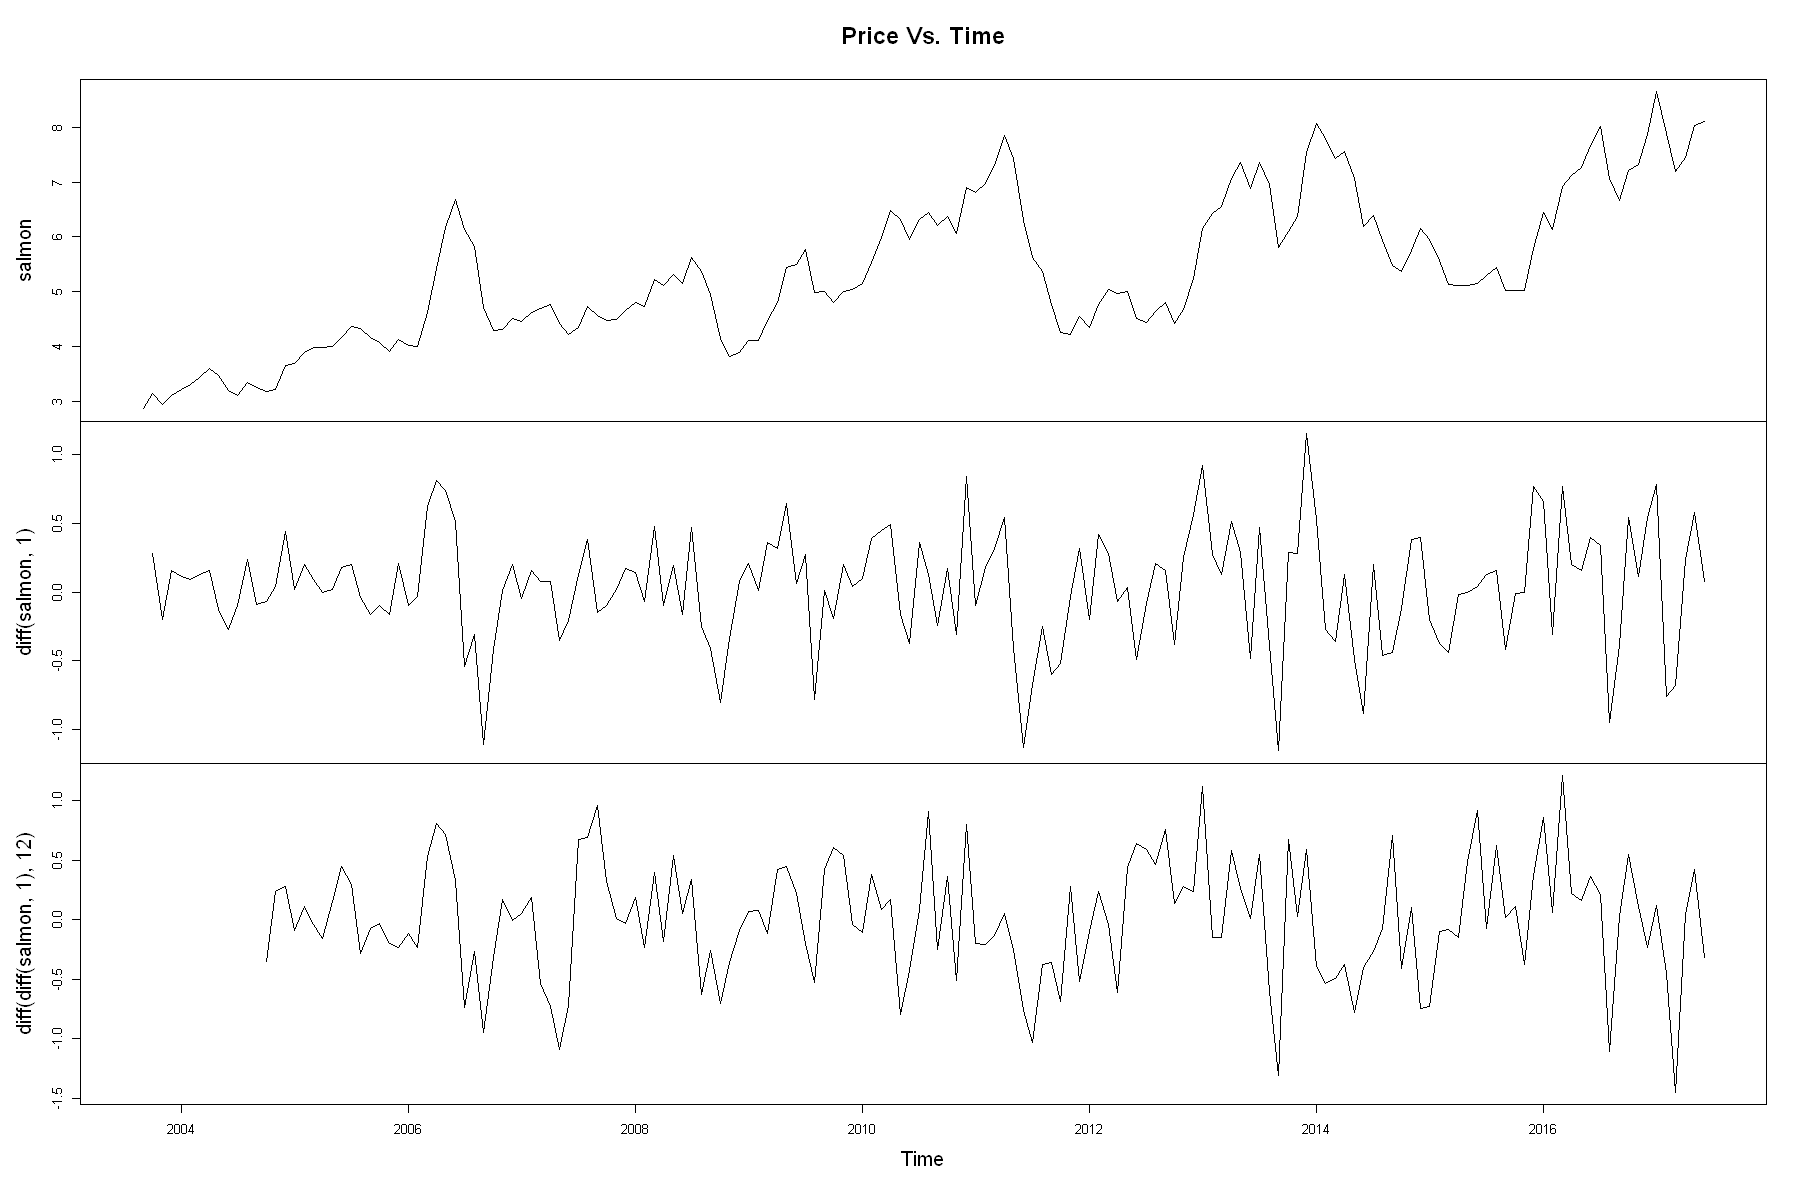

In [4]:
options(repr.plot.width = 15, repr.plot.height = 10)
plot.ts(cbind(salmon,diff(salmon,1),diff(diff(salmon,1),12)  ), main = "Price Vs. Time", ylab = "export price")

As we apply differencing to remove the predictable underlying trend from the time series, the plots increasingly exhibit random characteristics. This observation is instrumental in guiding our choice of an appropriate model for analysis. The Seasonal Autoregressive Integrated Moving Average (SARIMA) model emerges as a suitable candidate due to its capability to account for both trend and seasonality. Initially, we can fit the differenced time series with an ARMA (Autoregressive Moving Average) model. To fine-tune this model, we will utilize the widely adopted technique of examining the Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) of the processed series, which will provide insights into the data’s temporal structure.

ACF,0.93,0.84,0.75,0.68,0.61,0.54,0.50,0.47,0.45,0.42,...,0.34,0.3,0.26,0.23,0.21,0.21,0.20,0.19,0.16,0.12
PACF,0.93,-0.20,0.01,0.02,-0.04,0.04,0.08,0.05,0.00,-0.01,...,-0.03,0.0,-0.02,-0.06,-0.04,0.05,-0.06,0.02,0.02,0.07


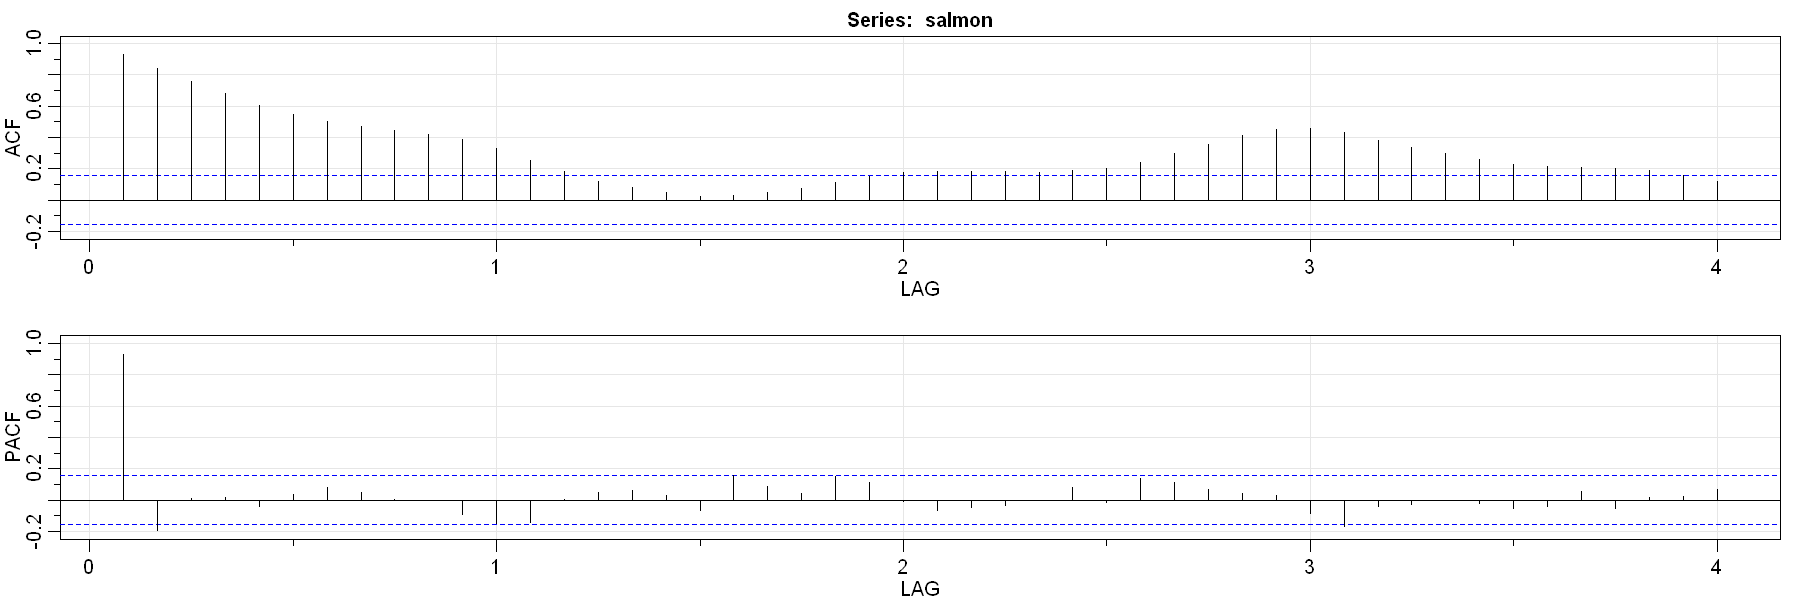

ACF,0.26,0.10,-0.03,-0.05,-0.11,0.08,0.06,0.05,0.14,0.09,...,0.04,0.03,0.01,0.16,0.01,0.00,-0.02,-0.08,-0.15,-0.07
PACF,0.26,0.03,-0.06,-0.03,-0.09,0.14,0.02,0.00,0.13,0.02,...,0.05,-0.10,-0.10,-0.03,-0.05,-0.06,-0.11,-0.09,-0.02,-0.06


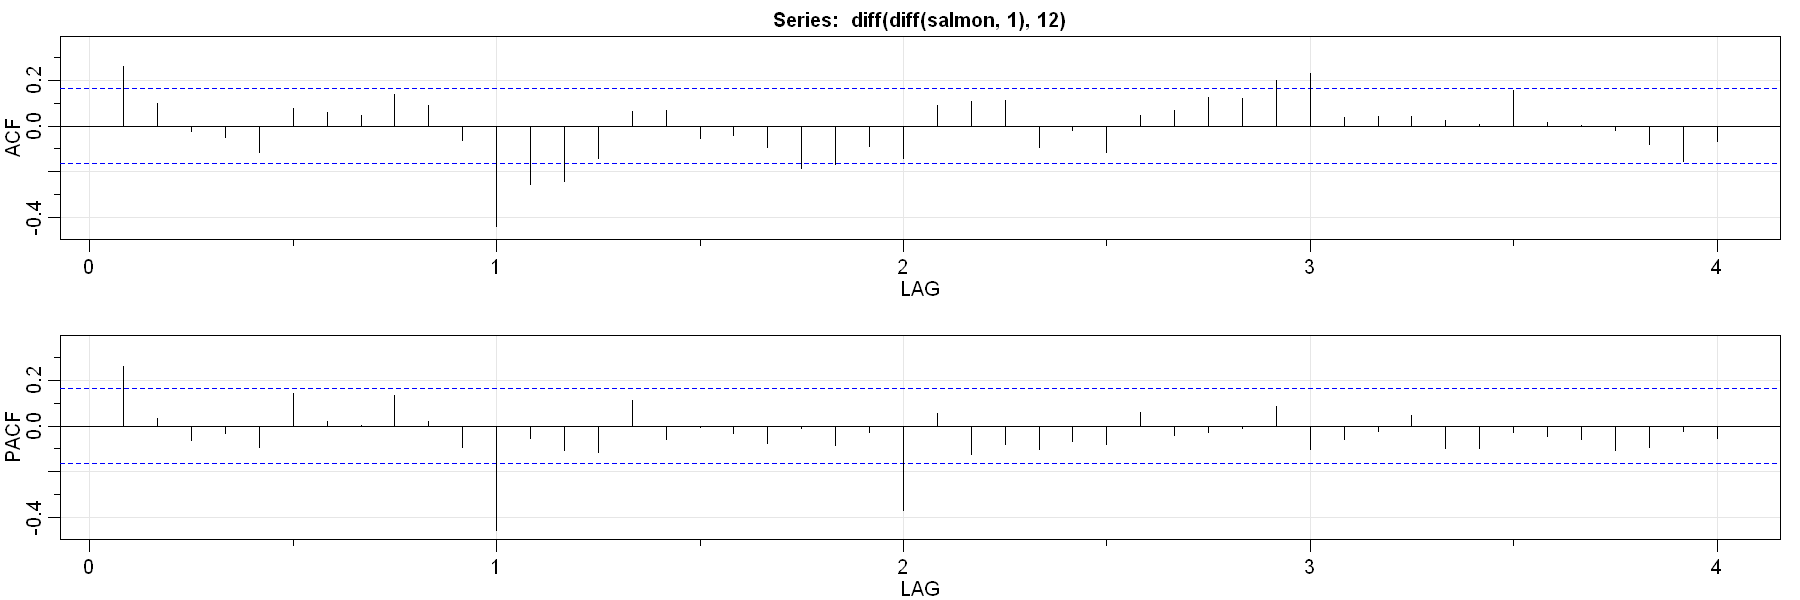

In [5]:
options(repr.plot.width = 15, repr.plot.height = 5)
# Plot ACF of the regular Salmon price series
acf2(salmon)
# Plot  ACF of processed series
acf2(diff(diff(salmon,1),12))

The analysis reveals a pronounced auto-correlation persisting over a 12-month period, underscoring the high seasonality inherent in the underlying time series of Norwegian Salmon prices. To address this, we will employ the Hyndman-Khandakar algorithm for the optimal selection of a Seasonal ARIMA (SARIMA) model. This algorithm iteratively explores various SARIMA models, selecting the one that minimizes the Akaike Information Criterion (AIC) and utilizes the Maximum Likelihood Estimation (MLE) method. The AIC is instrumental in balancing model fit and complexity, ensuring that the chosen model is both statistically sound and efficient.

In [6]:
#  fit a seasonal ARIMA model using Hyndman-Khandakar algorithm
auto.fit = forecast::auto.arima(salmon)
summary(auto.fit)

Series: salmon 
ARIMA(0,1,1)(0,0,1)[12] 

Coefficients:
         ma1    sma1
      0.2697  0.2303
s.e.  0.0713  0.0817

sigma^2 estimated as 0.1464:  log likelihood=-74.99
AIC=155.98   AICc=156.13   BIC=165.29

Training set error measures:
                     ME      RMSE       MAE       MPE     MAPE      MASE
Training set 0.01968076 0.3791985 0.2925818 0.2775182 5.324901 0.2633253
                    ACF1
Training set 0.008223241


The chosen model for our analysis is the SARIMA(1,1,0)(0,0,1)[12], a seasonal ARIMA model. This model is encapsulated by the following equation:
$$
(1 - \psi_1 B)  (X_t - X_{t-1}) =  (1 + \Theta_1 B^{12}) w_t
$$
where $X_t$ represents the value of the time series at time $t$, $B$ is the backshift operator satisfying  $B^k X_t = X_{t-k} $ and $w_t$ denotes a white noise series.
The parameters of the model, estimated through the fitting process, are as follows:
$$
\hat{\psi}_1 = 0.2796 \quad and \quad \hat{\Theta}_1 = 0.2139 .
$$

Next, we will conduct a comprehensive diagnostic analysis of the fitted SARIMA model. The primary objective of this stage is to verify whether the model's residuals conform to the fundamental assumptions of being distributed as white noise. This involves testing for randomness, constant variance, and zero mean in the residual series. Successfully meeting these criteria is crucial, as it implies that the model has effectively captured the underlying structure of the time series without leaving any systematic patterns unexplained.


	Ljung-Box test

data:  Residuals from ARIMA(0,1,1)(0,0,1)[12]
Q* = 25.283, df = 22, p-value = 0.2837

Model df: 2.   Total lags used: 24



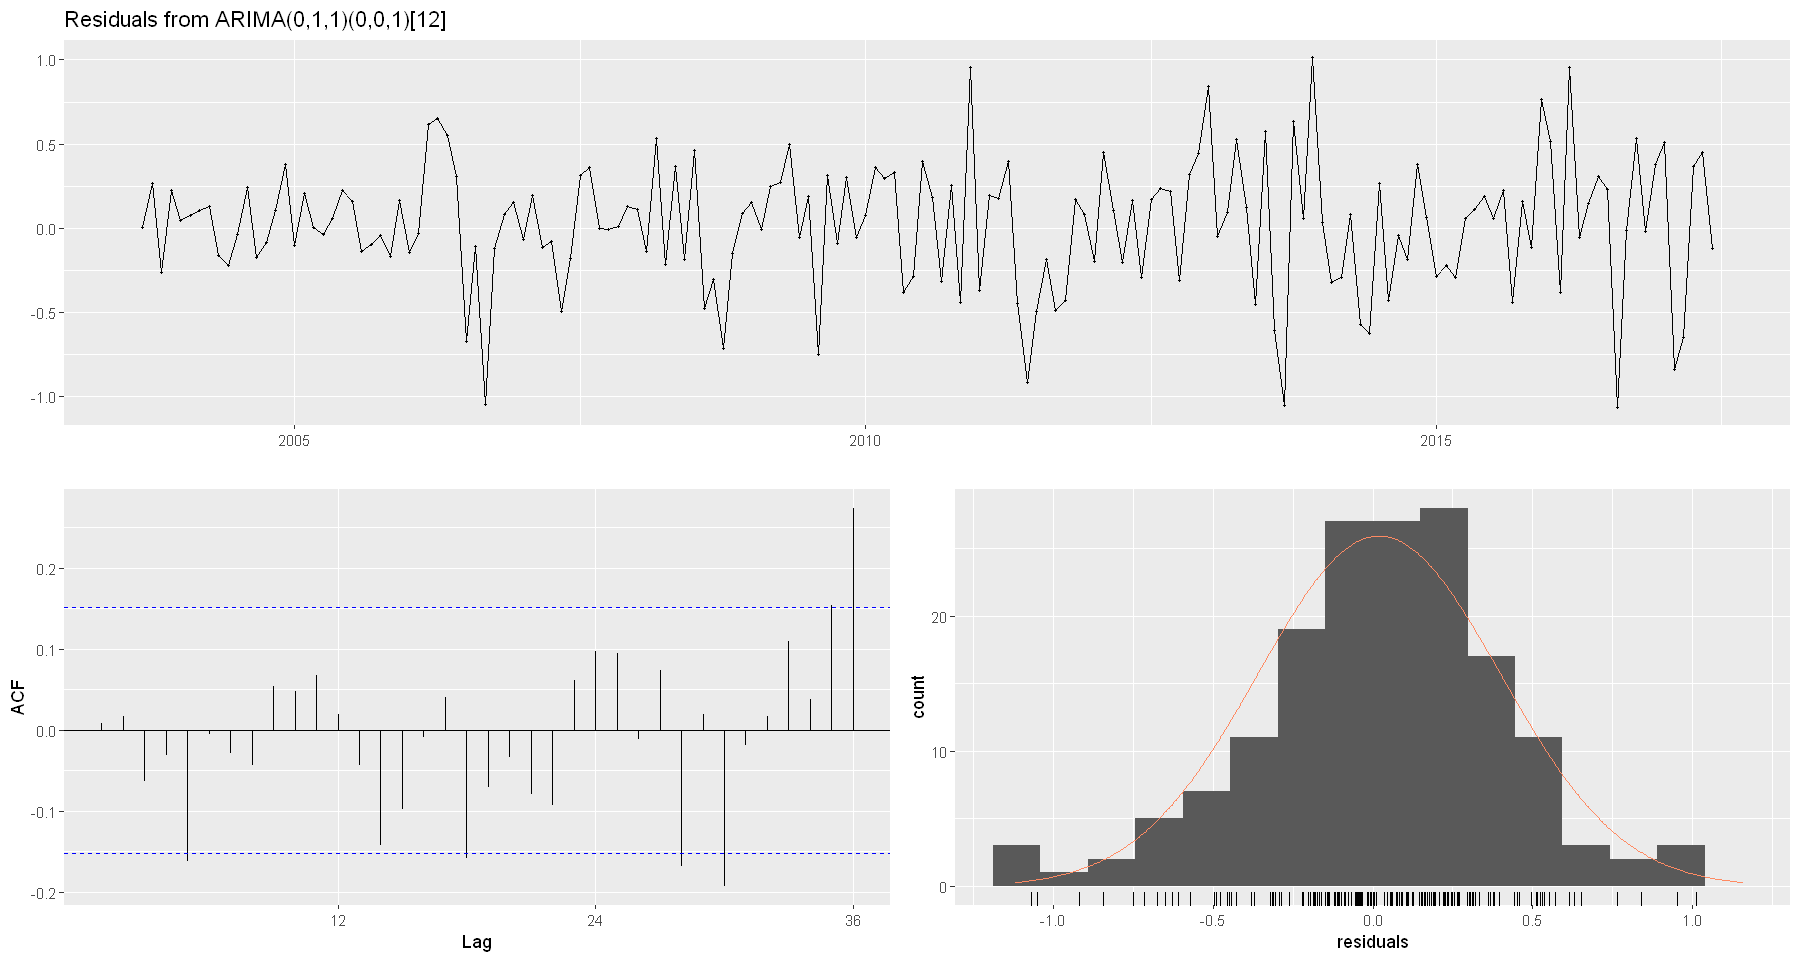

In [7]:
options(repr.plot.width = 15, repr.plot.height = 8)
forecast::checkresiduals(auto.fit)

The diagnostic analysis of our initially fitted SARIMA model indicates that the residuals are not independently distributed and exhibit serial correlation. Notably, the Autocorrelation Function (ACF) reveals persistent serial correlation at a 12-month period. This observation suggests that the seasonal component of our model requires refinement to adequately capture the time series' seasonal dynamics.

In response to this, we propose adjusting our model to a SARIMA(1,1,0)(0,1,1)[12]. This modification includes an additional seasonal differencing term at a lag of 12 months, aiming to address the observed periodicity in the ACF plot. The incorporation of this further differencing is expected to enhance the model's ability to account for the seasonal structure evident in the data.

Series: salmon 
ARIMA(1,1,0)(0,1,1)[12] 

Coefficients:
         ar1     sma1
      0.2205  -0.7958
s.e.  0.0791   0.0828

sigma^2 estimated as 0.14:  log likelihood=-71.74
AIC=149.48   AICc=149.64   BIC=158.57

Training set error measures:
                        ME      RMSE       MAE        MPE     MAPE      MASE
Training set -0.0005063286 0.3569134 0.2740846 -0.1184048 4.874294 0.2466778
                    ACF1
Training set 0.009688629

	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)(0,1,1)[12]
Q* = 26.628, df = 22, p-value = 0.2257

Model df: 2.   Total lags used: 24



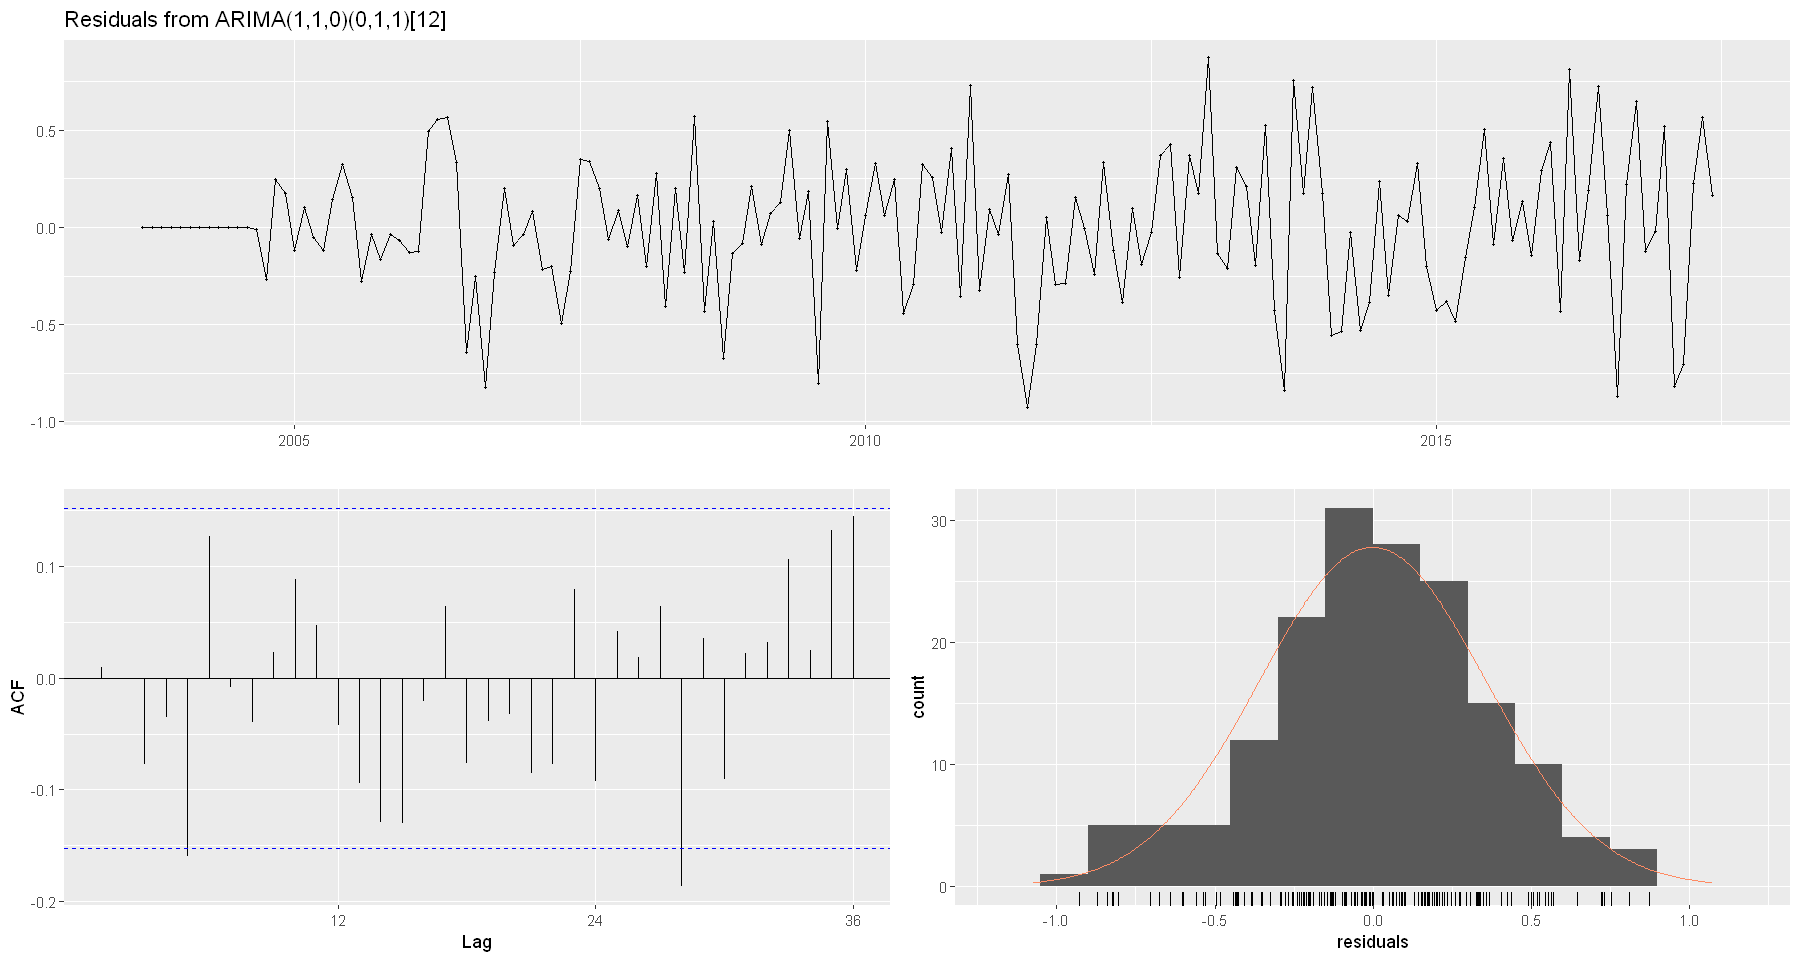

In [8]:
#fit a SARIMA(1,1,0)(0,1,1)[12] model
salmon.fit = forecast::Arima(salmon,order=c(1,1,0),
                   seasonal=list(order=c(0,1,1)) )
summary(salmon.fit)
forecast::checkresiduals(salmon.fit)

Despite the revised SARIMA model not passing the Ljung-Box test, which indicates the presence of serial correlation, there is a notable improvement in the Autocorrelation Function (ACF). The ACF now shows no strong auto-correlation in the residuals. This improvement is significant for forecasting purposes, as a stable auto-correlation pattern in the residuals is preferred. Such stability suggests that the model has effectively captured the underlying structure of the time series, making it more reliable for predicting future prices. While the Ljung-Box test result warrants caution, the enhanced ACF profile indicates progress toward a more robust forecasting model.

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jul 2017       8.319999 7.840183  8.799816 7.586184  9.053815
Aug 2017       8.036586 7.279507  8.793664 6.878734  9.194438
Sep 2017       7.618651 6.647068  8.590234 6.132743  9.104559
Oct 2017       7.637292 6.487969  8.786614 5.879554  9.395029
Nov 2017       7.731674 6.428100  9.035248 5.738029  9.725319
Dec 2017       8.283610 6.842091  9.725129 6.078997 10.488223
Jan 2018       8.653043 7.085652 10.220434 6.255925 11.050160
Feb 2018       8.454772 6.770887 10.138657 5.879493 11.030052
Mar 2018       8.459431 6.666605 10.252257 5.717541 11.201322
Apr 2018       8.671351 6.775835 10.566867 5.772409 11.570293
May 2018       8.796319 6.803396 10.789241 5.748407 11.844230
Jun 2018       8.644337 6.558553 10.730121 5.454405 11.834269

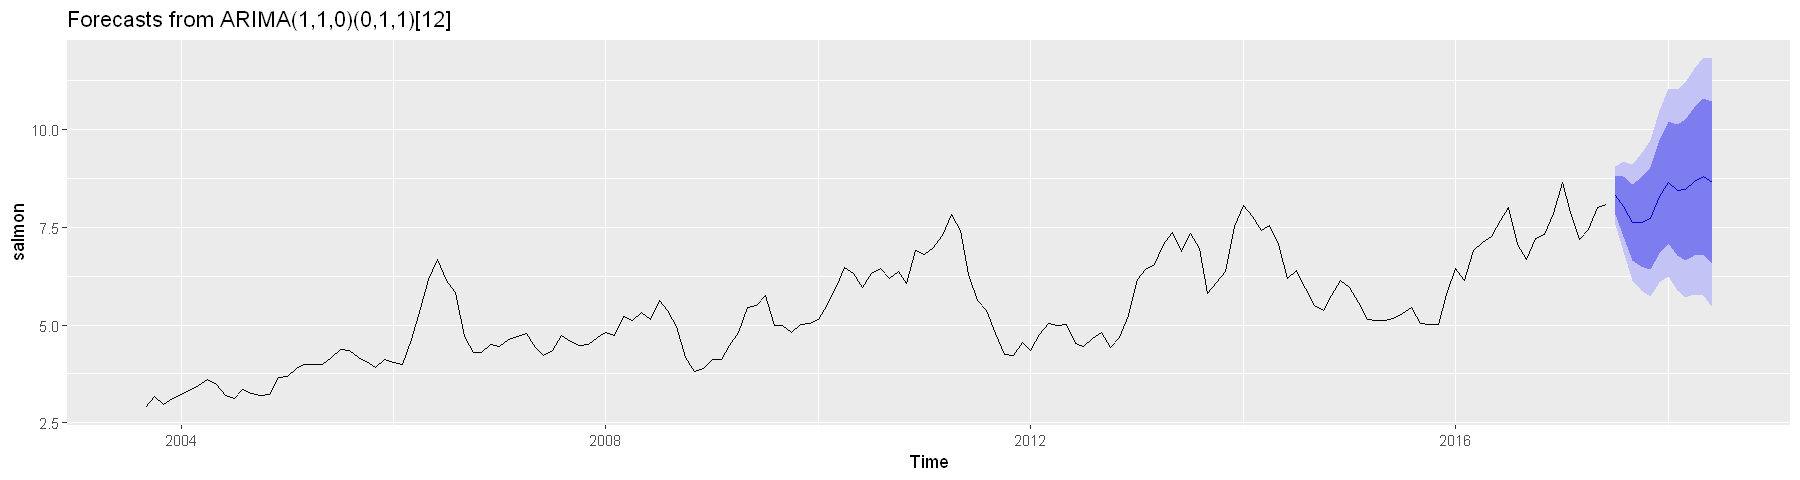

In [8]:
# Forcasting
options(repr.plot.width = 15, repr.plot.height = 4)
pred_1yr = forecast::forecast(h=12,salmon.fit)
pred_1yr
forecast::autoplot(pred_1yr)

Based on the SARIMA(1,1,0)(0,1,1)[12] model, we have forecasted future prices of Norwegian farmed salmon. The forecast is visually represented in the accompanying plot, where the expected price values are encompassed within two shaded regions. The dark blue region delineates the 80% confidence interval, offering a probable range for the forecast with a moderate level of certainty. In contrast, the light blue region specifies the 95% confidence interval, indicating a wider range but with greater certainty. This dual representation provides a nuanced understanding of the forecast's reliability and potential variability.